# Capstone 1 - Data Storytelling

**Kenneth Liao**
<br>**4/3/2019**

## Background

The goal of this project is to build a recommendation engine to recommend practice problems to students. The first part is to predict the number of attempts a student will require to solve a given problem. The idea is that if we can accurately predict the number of attempts a student will require to solve a problem, we can recommend a problem that is not too easy and not too hard (takes too many attempts). The data provided by Analytics Vidhya comes in three separate tables. The details of each dataset is described below.

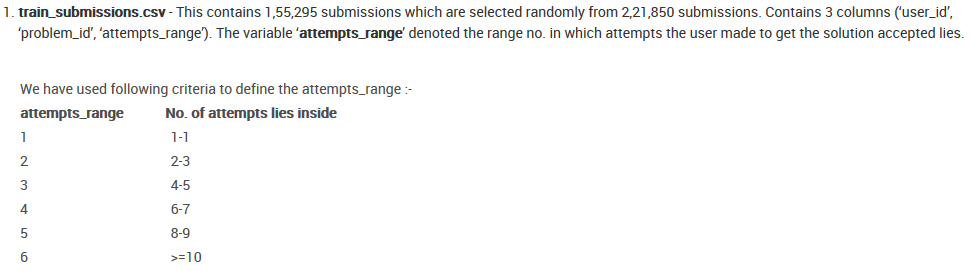

---

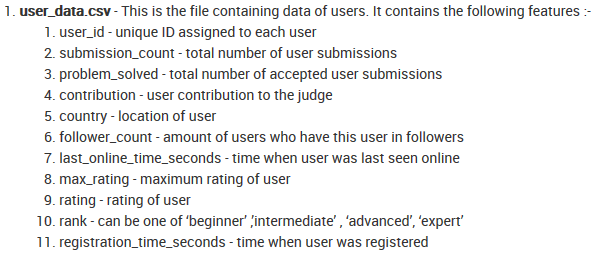

---

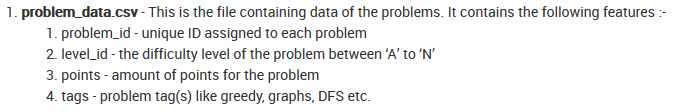

---

## Data Storytelling

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from tools import *
# config file contains API keys for using plotly
from config import credentials

# enable offline plotting in plotly
init_notebook_mode(connected=True)

In [2]:
# Load the submission, user, and problem datasets
submissions = pd.read_csv('data/train_submissions.csv')
problems = pd.read_csv('data/problem_features.csv')
users = pd.read_csv('data/user_features.csv')

## train_submission Dataset

I'll start by exploring the train_submission dataset. A sample of this dataset is shown in the table below. This is also the form of the data that will be submitted for benchmarking. There are only 3 columns: user_id, problem_id, and attempts_range; see above for how the number of attempts have been binned into the attempts_range variable.

In [3]:
submissions.head(10)

user_id problem_id  attempts_range
0   user_232  prob_6507               1
1  user_3568  prob_2994               3
2  user_1600  prob_5071               1
3  user_2256   prob_703               1
4  user_2321   prob_356               1
5  user_1569  prob_6064               1
6  user_3293  prob_1237               1
7   user_915  prob_4125               2
8  user_2032  prob_1943               1
9  user_1410  prob_3935               1

In [4]:
hist = go.Histogram(
    name = 'Count',
    x=submissions.attempts_range)
line = go.Scatter(
    name='Proportion',
    x=[1,2,3,4,5,6],
    y=[.533, .305, .091, .035, .016, .020],
    yaxis='y2'
)

hist_layout = go.Layout(
    title='attempts_range Histogram',
    titlefont = dict(size=20),
    xaxis=dict(
        title='attempts_range',
        titlefont=dict(
            size=18
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18
        )
    ),
    yaxis2=dict(
        title='Proportion',
        titlefont=dict(
            size=18
        ),
        overlaying='y',
        side='right',
        tickformat= ',.1%',
        range= [0,1],
        showgrid=False
    )
)

fig = go.Figure(data=[hist, line], layout=hist_layout)

iplot(fig, filename='attempts_range histogram')

The histogram above shows both the count and proportion of completed problems by attempts_range. 53% of problems are solved in a single attempt. 30.5% of problems are solved between 2 to 3 attempts and this drops quickly to 9.1% of problems being solved in 4 to 5 attempts. Because the provided data was already binned, there is no way for us to know what proportion of problems were solved for a specific number of attempts other than 1 attempt.

In [5]:
trace1 = go.Bar(
    name = 'Unique Count in Train_Submission',
    x=['user_id', 'problem_id'],
    y=[submissions.user_id.nunique(), submissions.problem_id.nunique()],
    text=[submissions.user_id.nunique(), submissions.problem_id.nunique()],
    textposition='auto')

trace2 = go.Bar(
    name = 'Unique Count in Feature Data',
    x=['user_id', 'problem_id'],
    y=[users.user_id.nunique(), problems.problem_id.nunique()],
    text=[users.user_id.nunique(), problems.problem_id.nunique()],
    textposition='auto')

bar_layout = go.Layout(
    title='User and Problem Unique Counts',
    titlefont = dict(size=20),
    xaxis=dict(
        tickfont=dict(
            size=18
        ),
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18
        )
    ),
    barmode='group'
)

fig = go.Figure(data=[trace1, trace2], layout=bar_layout)

iplot(fig, filename='attempts_range histogram')

The bar plot above shows the unique counts for user_id and problem_id in the train_submission dataset (blue) and the feature data (orange). The feature data are just the other two tables, one for users and one for problems. We can see that the feature data has a higher unique count in both cases. This is what we would expect since the user and problem meta data should be collected for every user and problem. But not every user will necessarily have solved at least one problem and not ever problem will necessarily have been solved at least once, these would thus not be included in the train_submission data. 

In [6]:
set(submissions.user_id.unique()).difference(set(users.user_id.unique()))

set()

We can see from the set difference above that all user_ids in the submissions dataset are in fact present in the users dataset. We can check the same for the problems.

In [7]:
prob_differences = set(submissions.problem_id.unique()).difference(set(problems.problem_id.unique()))
prob_differences

set()

The same is true for the problem_ids

## User Data

In [8]:
users.head(10)

user_id  submission_count  problem_solved  contribution     country  \
0     user_1                84              73            10  Bangladesh   
1    user_10               246             211             0        None   
2   user_100               642             574            27        Iran   
3  user_1000               259             235             0       India   
4  user_1001               554             492            -6     Moldova   
5  user_1002               127             108             0       Italy   
6  user_1003                14              14             0        None   
7  user_1004               310             287             1        None   
8  user_1005               332             301             3       India   
9  user_1006                 5               3             0        None   

   follower_count  last_online_time_seconds  max_rating   rating  \
0             120                1505162220     502.007  499.713   
1              30                1505079658     326.548  313.360   
2             106                1505073569     458.429  385.894   
3              41                1505579889     371.273  336.583   
4              55                1504521879     472.190  450.975   
5               7                1503094370     393.062  393.062   
6               0                1492588755     361.525  359.518   
7              14                1505136075     455.275  430.619   
8              27                1505583060     401.376  401.376   
9               1                1484905281     315.940  292.144   

           rank  registration_time_seconds  user_attempts_median  \
0      advanced                 1469108674                   1.0   
1  intermediate                 1472038187                   1.0   
2  intermediate                 1323974332                   1.0   
3  intermediate                 1450375392                   1.0   
4  intermediate                 1423399585                   1.0   
5  intermediate                 1466579214                   2.0   
6  intermediate                 1483011057                   1.0   
7  intermediate                 1464745715                   1.5   
8  intermediate                 1446652801                   1.0   
9      beginner                 1473183931                   1.0   

   user_attempts_min  user_attempts_max  user_attempts_count  \
0                1.0                3.0                 60.0   
1                1.0                3.0                 51.0   
2                1.0                5.0                 57.0   
3                1.0                3.0                 55.0   
4                1.0                6.0                 58.0   
5                1.0                6.0                 39.0   
6                1.0                3.0                 11.0   
7                1.0                6.0                 48.0   
8                1.0                6.0                 50.0   
9                1.0                1.0                  2.0   

   user_attempts_iqr  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
5                0.0  
6                0.0  
7                0.0  
8                0.0  
9                0.0

In [9]:
create_hists(users, cols=['submission_count'])

In [10]:
create_hists(users, cols=['problem_solved'])

The submission_count and problem_solved features appear to have very similar distributions. We can create a scatter plot of the problem_solved against submission_count to see how they're correlated.

In [12]:
trace = go.Scatter(
            name = 'Problems submitted vs solved',
            x=users.submission_count,
            y=users.problem_solved,
            mode='markers')

layout = go.Layout(
            title='Problems submitted vs solved',
            titlefont = dict(size=20),
            xaxis=dict(
                title='submission_count',
                titlefont=dict(
                    size=18
                )
            ),
            yaxis=dict(
                title='problem_solved',
                titlefont=dict(
                    size=18
                )
            )
        )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='submission_count vs problem_solved')

The scatter plot above shows that there is a high correlation between problem_solved and submission_count. There is an obvious upper limit to the data that follows the line problem_solved=submission_count and arises naturally of course since a user can't solve more problems than they've submitted.

In [30]:
counusers[['user_id', 'country']].groupby('country').count()

user_id
country                        
Argentina                    12
Armenia                       4
Australia                     1
Austria                       2
Azerbaijan                    6
Bangladesh                  329
Belarus                      49
Belgium                       1
Bolivia                       6
Bosnia and Herzegovina        1
Brazil                       71
Bulgaria                      4
Canada                        7
Chile                         2
China                       162
Christmas Island              1
Colombia                      8
Costa Rica                    1
Croatia                      24
Cuba                          8
Czechia                       6
Egypt                        99
Estonia                       3
Finland                       5
France                        1
Georgia                      14
Germany                       7
Haiti                         1
Hong Kong                     6
Hungary                       4
...                         ...
Netherlands                   3
None                       1153
North Korea                   3
Norway                        1
Peru                         10
Philippines                   1
Poland                       32
Romania                      40
Russia                      262
Serbia                        5
Singapore                     5
Slovakia                      3
South Africa                  2
South Korea                  26
Spain                         3
Swaziland                     1
Switzerland                   2
Syria                        40
Taiwan                       22
Tajikistan                    7
Thailand                      6
Trinidad and Tobago           1
Tunisia                       4
Turkmenistan                  4
Ukraine                      63
United Kingdom                3
United States                39
Uzbekistan                   28
Venezuela                     2
Vietnam                      63

[80 rows x 1 columns]

In [26]:
trace1 = go.Bar(
    name = 'Country Histogram',
    x=users.country.unique(),
    y=,
    text=[submissions.user_id.nunique(), submissions.problem_id.nunique()],
    textposition='auto')

bar_layout = go.Layout(
    title='Country Histogram',
    titlefont = dict(size=20),
    xaxis=dict(
        tickfont=dict(
            size=18
        ),
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18
        )
    ),
    barmode='group'
)

fig = go.Figure(data=[trace1, trace2], layout=bar_layout)

iplot(fig, filename='Country histogram')

In [14]:
create_hists(users, cols=['contribution'], ylog=True)

In [15]:
create_hists(users, cols=['follower_count'], ylog=True)

In [16]:
create_hists(users, cols=['last_online_time_seconds'])

In [17]:
create_hists(users, cols=['max_rating'])

In [18]:
create_hists(users, cols=['rating'])

In [19]:
trace = go.Scatter(
            name = 'Rating vs Max Rating',
            x=users.max_rating,
            y=users.rating,
            mode='markers')

layout = go.Layout(
            title='Rating vs Max Rating',
            titlefont = dict(size=20),
            xaxis=dict(
                title='Max Rating',
                titlefont=dict(
                    size=18
                )
            ),
            yaxis=dict(
                title='Rating',
                titlefont=dict(
                    size=18
                )
            )
        )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='Rating vs Max Rating')

There is a natural upper bound where for each user, the rating cannot be higher than the maximum rating they had. The upper bound corresponds to users with a rating equal to their current maximum rating.

In [20]:
create_hists(users, cols=['registration_time_seconds'])

In [21]:
create_hists(users, cols=['user_attempts_median'], ylog=True)

In [22]:
create_hists(users, cols=['user_attempts_min'], ylog=True)

In [23]:
create_hists(users, cols=['user_attempts_max'])

In [24]:
create_hists(users, cols=['user_attempts_count'])

In [25]:
create_hists(users, cols=['user_attempts_iqr'], ylog=True)

## Problems

In [ ]:
problem_correlations = problems.loc[:, 'points': 'problem_attempts_iqr'].corr()
problem_correlations.style.apply(lambda x: highlight(x), axis = 1)

In [ ]:
problem_levels = problems[['level_type', 'problem_id_number']].groupby('level_type').count()

In [ ]:
data = [
  go.Bar(
    y = problem_levels.problem_id_number,
    x = problem_levels.index,
    name = "count"
  )
]

iplot(data, filename='binning function')

In [ ]:
create_hists(problems, cols=['points'])

In [ ]:
create_hists(problems, cols=['problem_attempts_median'], ylog=True)

In [ ]:
create_hists(problems, cols=['problem_attempts_min'], ylog=True)

In [ ]:
create_hists(problems, cols=['problem_attempts_max'], ylog=True)

In [ ]:
create_hists(problems, cols=['problem_attempts_count'], ylog=True)

In [ ]:
create_hists(problems, cols=['problem_attempts_iqr'], ylog=True)